# Expand window

In [366]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Import Libraries

In [367]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load train and test data

In [368]:
test_data = pd.read_csv("../../data/test/raw.csv")
print(test_data.shape)
test_data.sample(5)

(109541, 13)


,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
72476,10236786,"14,000",6 years,Mortgage,81600.0,not verified,home_improvement,28.13,2,25.0,7,24,Female
75659,10239969,"3,000",10+ years,Own,130000.0,VERIFIED - income,debt_consolidation,27.05,2,NaN,14,50,Male
33883,10198193,"21,250",10+ years,NaN,1200000.0,VERIFIED - income,credit_card,2.05,0,NaN,13,31,Female
108046,10272356,"20,000",4 years,Mortgage,50000.0,VERIFIED - income,debt_consolidation,4.34,0,18.0,7,30,Male
92704,10257014,"4,800",1 year,Rent,16380.0,VERIFIED - income,debt_consolidation,27.77,0,NaN,8,20,Male


In [369]:
train_data = pd.read_csv("../../data/train/raw.csv")
print(train_data.shape)
train_data.sample(5)

(164309, 14)


,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
51446,10051447,"10,000",10+ years,Mortgage,60000.0,VERIFIED - income source,credit_card,15.72,0,NaN,18,40,Male,3
102368,10102369,"12,000",10+ years,Mortgage,55000.0,not verified,debt_consolidation,13.70,0,NaN,22,35,Female,1
47686,10047687,"21,000",< 1 year,Rent,118000.0,VERIFIED - income source,debt_consolidation,16.28,0,5.0,15,33,Male,3
147291,10147292,"20,300",10+ years,NaN,50000.0,VERIFIED - income,debt_consolidation,37.47,0,49.0,10,30,Male,2
127035,10127036,"22,400",10+ years,Mortgage,110000.0,VERIFIED - income source,debt_consolidation,11.89,0,44.0,16,40,Male,2


# Clean data types

In [370]:
train_data.select_dtypes(exclude='object').head()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
0,10000001,68000.0,18.37,0,NaN,9,14,1
1,10000002,NaN,14.93,0,17.0,12,24,3
2,10000003,75566.4,15.88,0,NaN,12,16,3
3,10000004,56160.0,14.34,3,NaN,16,22,3
4,10000005,96000.0,22.17,1,NaN,19,30,1


In [371]:
train_data.select_dtypes(include='object').head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Income_Verified,Purpose_Of_Loan,Gender
0,"7,000",< 1 year,Rent,not verified,car,Female
1,"30,000",4 years,Mortgage,VERIFIED - income,debt_consolidation,Female
2,"24,725",7 years,Mortgage,VERIFIED - income source,debt_consolidation,Male
3,"16,000",< 1 year,NaN,VERIFIED - income source,debt_consolidation,Male
4,"17,000",8 years,Own,VERIFIED - income source,debt_consolidation,Female


<b> From above we can see that 'Loan_Amount_Requested' is number but considered as an object <br /> Q: Why?</b> 

In [372]:
train_data['Loan_Amount_Requested'].sample(10)

105962    35,000
102309    35,000
50309     17,000
136381    19,425
148302     9,500
108626    27,000
136764     2,000
119803     8,000
115486     8,000
8074       6,150
Name: Loan_Amount_Requested, dtype: object

<b> Ans: We can see that it has comma separated value and is considered as string </b>

In [373]:
# Train Data
print("Train data before conversion:", train_data['Loan_Amount_Requested'].dtype)

#Remove comma in string and convert to int
train_data['Loan_Amount_Requested'] = train_data['Loan_Amount_Requested'].apply(lambda val: float(val.replace(',', '')))

print("Train data after conversion: ", train_data['Loan_Amount_Requested'].dtype)



print("==================================================")





# Test Data
print("Test data before conversion:", test_data['Loan_Amount_Requested'].dtype)

#Remove comma in string and convert to int
test_data['Loan_Amount_Requested'] = test_data['Loan_Amount_Requested'].apply(lambda val: float(val.replace(',', '')))

print("Test data after conversion: ", test_data['Loan_Amount_Requested'].dtype)

Train data before conversion: object
Train data after conversion:  float64
Test data before conversion: object
Test data after conversion:  float64


# Check for null

In [374]:
def get_missing_info(data_frame, include_empty = False):
    missing_count = data_frame.isnull().sum()
    
    percent_missing = (missing_count/len(data_frame)) * 100  
    
    percent_missing_df = percent_missing.to_frame("Percent_Missing")
    percent_missing_df['Total_Missing'] = missing_count
    
    if include_empty:
        return percent_missing_df
    
    return percent_missing_df.loc[percent_missing_df['Percent_Missing'] > 0]

In [375]:
get_missing_info(train_data)

,Percent_Missing,Total_Missing
Length_Employed,4.486060,7371
Home_Owner,15.427639,25349
Annual_Income,15.277313,25102
Months_Since_Deliquency,53.788289,88379


In [376]:
get_missing_info(test_data)

,Percent_Missing,Total_Missing
Length_Employed,4.506075,4936
Home_Owner,15.255475,16711
Annual_Income,15.426187,16898
Months_Since_Deliquency,53.732392,58859


## Impute missing data

### 1. Length Employed

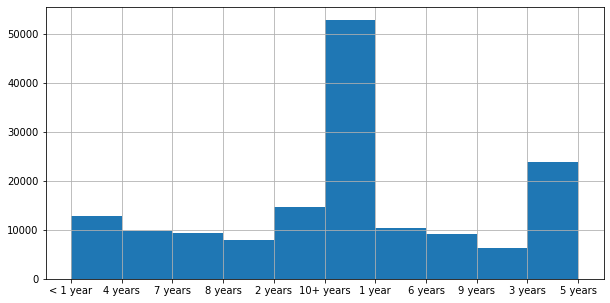

In [377]:
train_data['Length_Employed'].hist(bins=10,figsize=(10,5));

In [378]:
train_data['Length_Employed'].value_counts(dropna = False, normalize = True).to_frame('Share').apply(lambda x: x*100)

,Share
10+ years,32.204566
2 years,8.897869
3 years,7.896098
< 1 year,7.793243
5 years,6.581502
1 year,6.342927
4 years,5.954634
7 years,5.664936
6 years,5.534694
8 years,4.818361


Majority of data is skewed at 10+ years. So its better to take median value to impute 'Length_Employed'

In [379]:
train_data['Length_Employed'] = train_data['Length_Employed'].fillna('1 year')
test_data['Length_Employed'] = test_data['Length_Employed'].fillna('1 year')

print("Train missing", train_data['Length_Employed'].isna().sum())
print("Test missing", test_data['Length_Employed'].isna().sum())

get_missing_info(train_data)

Train missing 0
Test missing 0


,Percent_Missing,Total_Missing
Home_Owner,15.427639,25349
Annual_Income,15.277313,25102
Months_Since_Deliquency,53.788289,88379


### 2. Home owner

In [380]:
train_data['Home_Owner'].describe()

count       138960
unique           5
top       Mortgage
freq         70345
Name: Home_Owner, dtype: object

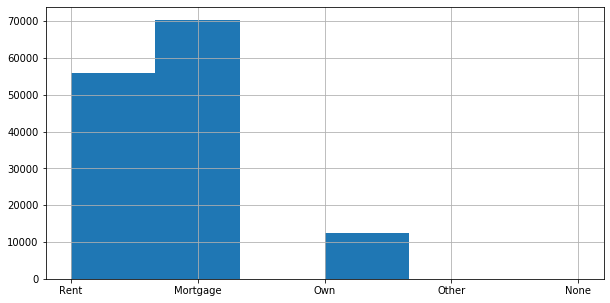

In [381]:
train_data['Home_Owner'].hist(bins = 6, figsize=(10,5));

In [382]:
train_data['Home_Owner'].value_counts(dropna = False, normalize = True).to_frame('Share').apply(lambda x: x*100)

,Share
Mortgage,42.812627
Rent,34.100993
NaN,15.427639
Own,7.622833
Other,0.029822
None,0.006086


Majority of data is skewed towards 'Mortgage'. So let's fillna with nearly centered value which is 'Rent'

In [383]:
train_data['Home_Owner'] = train_data['Home_Owner'].fillna('Rent')
test_data['Home_Owner'] = test_data['Home_Owner'].fillna('Rent')

print("Train missing", train_data['Length_Employed'].isna().sum())
print("Test missing", test_data['Length_Employed'].isna().sum())

Train missing 0
Test missing 0


In [384]:
get_missing_info(train_data)

,Percent_Missing,Total_Missing
Annual_Income,15.277313,25102
Months_Since_Deliquency,53.788289,88379


In [385]:
get_missing_info(test_data)

,Percent_Missing,Total_Missing
Annual_Income,15.426187,16898
Months_Since_Deliquency,53.732392,58859


### 3. Annual Income

In [386]:
train_data['Annual_Income'].describe()

count    1.392070e+05
mean     7.333116e+04
std      6.037750e+04
min      4.000000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.869750e+04
max      7.500000e+06
Name: Annual_Income, dtype: float64

In [387]:
train_data['Annual_Income'].min(), train_data['Annual_Income'].max()

(4000.0, 7500000.0)

In [388]:
train_data['Annual_Income'].median()

63000.0

We can see that there is huge difference between 'min' and 'max'. let's fillna with median

In [389]:
train_data['Annual_Income'].describe()

count    1.392070e+05
mean     7.333116e+04
std      6.037750e+04
min      4.000000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.869750e+04
max      7.500000e+06
Name: Annual_Income, dtype: float64

In [390]:
train_data['Annual_Income'] = train_data['Annual_Income'].fillna(train_data['Annual_Income'].median())
test_data['Annual_Income'] = test_data['Annual_Income'].fillna(train_data['Annual_Income'].median())# Fill test_data's NA with train_data median(annual income)

print("Train missing", train_data['Annual_Income'].isna().sum())
print("Test missing", test_data['Annual_Income'].isna().sum())


Train missing 0
Test missing 0


In [391]:
get_missing_info(train_data)

,Percent_Missing,Total_Missing
Months_Since_Deliquency,53.788289,88379


In [392]:
get_missing_info(test_data)

,Percent_Missing,Total_Missing
Months_Since_Deliquency,53.732392,58859


### 4. Months Since Deliquency

In [393]:
get_missing_info(train_data)

,Percent_Missing,Total_Missing
Months_Since_Deliquency,53.788289,88379


In [394]:
# As we can see that more than 50% of data is missing. Let's just drop and not use this column -->

In [395]:
column = 'Months_Since_Deliquency'
train_data[column] = train_data[column].fillna(train_data[column].median())
test_data[column] = test_data[column].fillna(train_data[column].median()) # Fill test_data NA with train_data median

print("Train missing", train_data[column].isna().sum())
print("Test missing", test_data[column].isna().sum())


Train missing 0
Test missing 0


In [396]:
get_missing_info(train_data)

,Percent_Missing,Total_Missing


In [397]:
get_missing_info(test_data)

,Percent_Missing,Total_Missing


# Save Imputed Data

In [398]:
train_data.shape

(164309, 14)

In [399]:
test_data.shape

(109541, 13)

In [401]:
train_data.to_csv("../../data/train/pre_processed.csv", index=False)
test_data.to_csv("../../data/test/pre_processed.csv", index=False)

In [402]:
train_data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000.0,< 1 year,Rent,68000.0,not verified,car,18.37,0,31.0,9,14,Female,1
1,10000002,30000.0,4 years,Mortgage,63000.0,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,24725.0,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,31.0,12,16,Male,3
3,10000004,16000.0,< 1 year,Rent,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,31.0,16,22,Male,3
4,10000005,17000.0,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,31.0,19,30,Female,1


In [413]:
ir_1 = train_data.loc[train_data['Interest_Rate']==1]
ir_1.sample(5)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
67976,10067977,6425.0,5 years,Mortgage,113000.0,not verified,major_purchase,4.09,0,31.0,6,28,Female,1
138561,10138562,21000.0,6 years,Mortgage,80000.0,VERIFIED - income source,debt_consolidation,17.55,0,23.0,14,26,Female,1
163364,10163365,8000.0,3 years,Rent,127000.0,VERIFIED - income,major_purchase,16.28,0,31.0,23,46,Male,1
72932,10072933,5500.0,10+ years,Mortgage,80000.0,VERIFIED - income source,car,21.35,2,31.0,22,55,Male,1
133964,10133965,10400.0,8 years,Mortgage,58000.0,not verified,credit_card,14.92,2,42.0,17,36,Male,1


In [415]:
ir_2 = train_data.loc[train_data['Interest_Rate']==2]
ir_2.sample(5)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
7,10000008,15000.0,< 1 year,Rent,115000.0,VERIFIED - income,debt_consolidation,7.97,1,16.0,25,31,Female,2
10,10000011,11700.0,10+ years,Mortgage,62000.0,VERIFIED - income,debt_consolidation,30.91,0,31.0,8,22,Male,2
11,10000012,15000.0,10+ years,Rent,70000.0,not verified,credit_card,8.95,0,31.0,7,13,Male,2
12,10000013,7200.0,10+ years,Rent,55000.0,VERIFIED - income source,debt_consolidation,31.25,0,68.0,5,16,Male,2
13,10000014,15000.0,10+ years,Mortgage,63000.0,VERIFIED - income source,debt_consolidation,21.03,0,31.0,9,14,Male,2


In [416]:
ir_3 = train_data.loc[train_data['Interest_Rate']==3]
ir_3.sample(5)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
149915,10149916,9975.0,7 years,Rent,20000.0,VERIFIED - income,debt_consolidation,25.87,0,42.0,7,14,Female,3
16156,10016157,28425.0,1 year,Mortgage,89000.0,VERIFIED - income source,debt_consolidation,12.58,2,31.0,10,31,Male,3
131434,10131435,11950.0,3 years,Mortgage,46000.0,not verified,debt_consolidation,23.04,1,36.0,6,19,Male,3
160532,10160533,8500.0,1 year,Rent,40000.0,VERIFIED - income,debt_consolidation,11.43,1,31.0,4,12,Male,3
90405,10090406,19500.0,6 years,Mortgage,63000.0,VERIFIED - income,debt_consolidation,20.66,3,39.0,10,32,Male,3


Text(0.5, 1.0, '3')

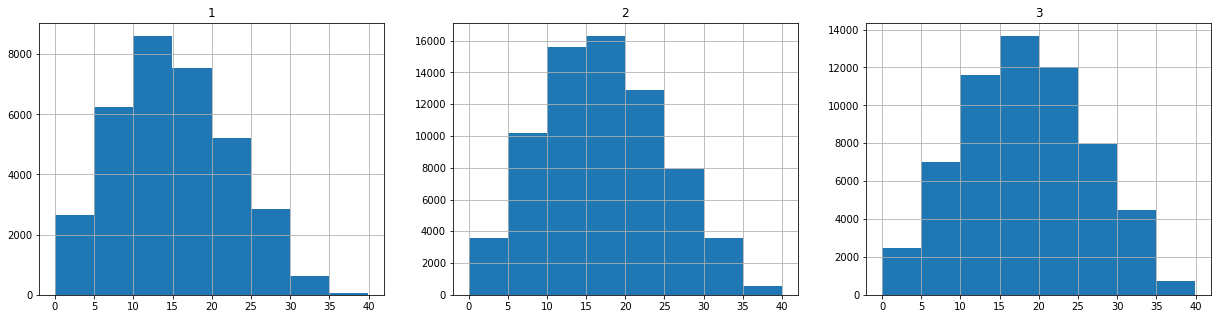

In [441]:
fig, ax = plt.subplots(1,3, figsize=(21,5))
bins = 8

COLUMN_TO_CHECK = 'Debt_To_Income'

ir_1[COLUMN_TO_CHECK].hist(bins=bins, ax = ax[0]);
ax[0].set_title("1")

ir_2[COLUMN_TO_CHECK].hist(bins=bins, ax = ax[1]);
ax[1].set_title("2")

ir_3[COLUMN_TO_CHECK].hist(bins=bins, ax = ax[2]);
ax[2].set_title("3")

Text(0.5, 1.0, '3')

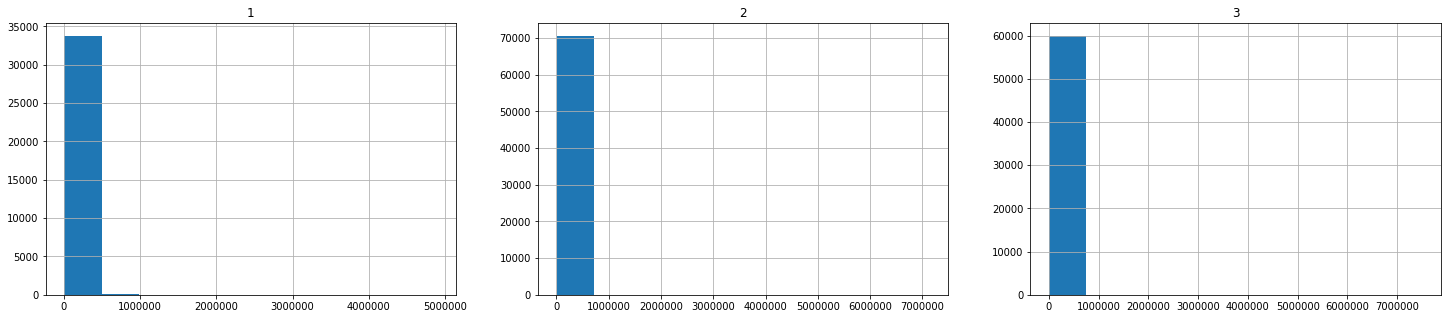

In [445]:
fig, ax = plt.subplots(1,3, figsize=(25,5))
bins = 10

COLUMN_TO_CHECK = 'Annual_Income'

ir_1[COLUMN_TO_CHECK].hist(bins=bins, ax = ax[0]);
ax[0].set_title("1")

ir_2[COLUMN_TO_CHECK].hist(bins=bins, ax = ax[1]);
ax[1].set_title("2")

ir_3[COLUMN_TO_CHECK].hist(bins=bins, ax = ax[2]);
ax[2].set_title("3")

In [451]:
ir_1['Annual_Income'].describe().apply(lambda x: format(x, 'f'))

count      33806.000000
mean       78503.289623
std        56552.869715
min         5000.000000
25%        53600.000000
50%        63000.000000
75%        91000.000000
max      4900000.000000
Name: Annual_Income, dtype: object

In [452]:
ir_2['Annual_Income'].describe().apply(lambda x: format(x, 'f'))

count      70580.000000
mean       69936.895009
std        54506.035531
min         4000.000000
25%        47000.000000
50%        63000.000000
75%        80000.000000
max      7141778.000000
Name: Annual_Income, dtype: object

In [453]:
ir_3['Annual_Income'].describe().apply(lambda x: format(x, 'f'))

count      59923.000000
mean       70083.414592
std        56309.359278
min         4800.000000
25%        48000.000000
50%        63000.000000
75%        80000.000000
max      7500000.000000
Name: Annual_Income, dtype: object

# IR 1

In [455]:
ir_1.loc[ir_1['Annual_Income'] ==  ir_1['Annual_Income'].min()]

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
110754,10110755,1000.0,< 1 year,Rent,5000.0,not verified,debt_consolidation,18.0,2,0.0,5,7,Male,1


In [456]:
ir_1.loc[ir_1['Annual_Income'] ==  ir_1['Annual_Income'].max()]

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
159569,10159570,15600.0,8 years,Mortgage,4900000.0,not verified,debt_consolidation,0.11,0,4.0,13,26,Male,1


# IR 2

In [459]:
ir_2.loc[ir_2['Annual_Income'] ==  ir_2['Annual_Income'].min()]

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
29808,10029809,2000.0,< 1 year,Rent,4000.0,not verified,educational,6.00,2,31.0,6,6,Male,2
137615,10137616,1300.0,1 year,Own,4000.0,VERIFIED - income source,debt_consolidation,15.02,0,31.0,15,42,Female,2


In [460]:
ir_2.loc[ir_2['Annual_Income'] ==  ir_2['Annual_Income'].max()]

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
156075,10156076,14825.0,10+ years,Mortgage,7141778.0,VERIFIED - income source,debt_consolidation,0.25,2,26.0,17,31,Male,2


# IR 3

In [461]:
ir_3.loc[ir_3['Annual_Income'] ==  ir_3['Annual_Income'].min()]

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
32343,10032344,1000.0,1 year,Rent,4800.0,VERIFIED - income,credit_card,20.75,1,31.0,11,15,Male,3


In [462]:
ir_3.loc[ir_3['Annual_Income'] ==  ir_3['Annual_Income'].max()]

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
88088,10088089,15000.0,10+ years,Mortgage,7500000.0,VERIFIED - income,medical,0.2,5,17.0,29,42,Male,3


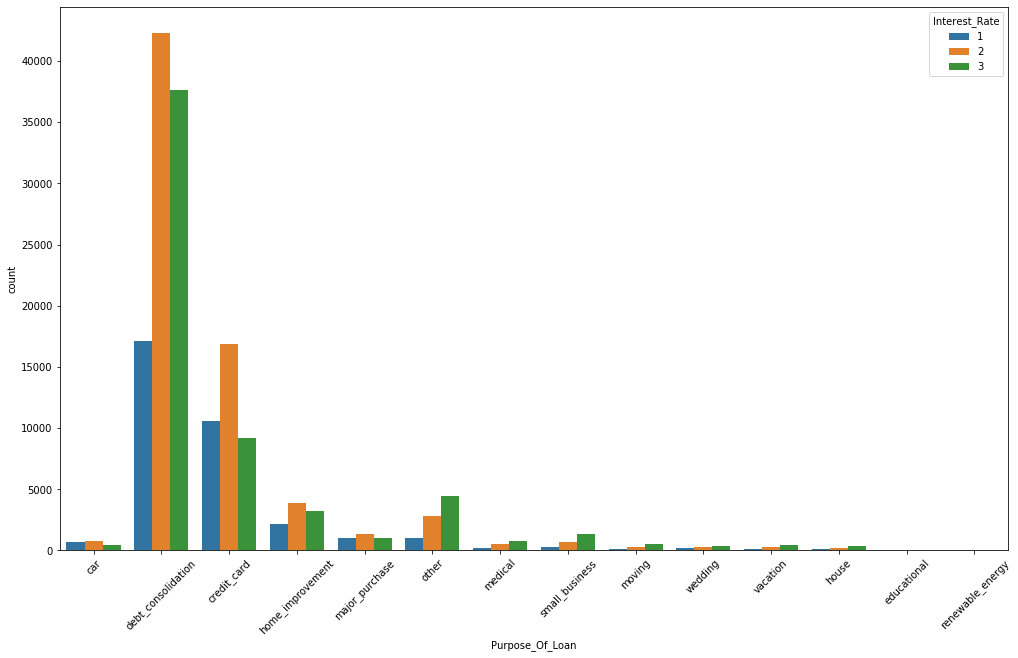

In [473]:
plt.subplots(figsize=(17,10))

sns.countplot(train_data['Purpose_Of_Loan'], hue = train_data['Interest_Rate']);

plt.xticks(rotation=45)
plt.show()

# Process data

In [334]:
train_data = train_data.drop(['Loan_ID'], axis =1, errors='ignore')
train_data.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7000.0,< 1 year,Rent,68000.0,not verified,car,18.37,0,31.0,9,14,Female,1
1,30000.0,4 years,Mortgage,63000.0,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,24725.0,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,31.0,12,16,Male,3
3,16000.0,< 1 year,Rent,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,31.0,16,22,Male,3
4,17000.0,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,31.0,19,30,Female,1


# Label encoding

In [335]:
# Length Employed
def get_encoded_experience_data(data):

    encoded_data = data.copy()
    encoded_data['Experience'] = data['Length_Employed'].replace('< 1 year', '0.5')# Replacing <1 with 0.5 because converting 0 does not make sense.
    encoded_data['Experience'] = encoded_data['Experience'].str.replace('years', '')
    encoded_data['Experience'] = encoded_data['Experience'].str.replace('year', '')
    encoded_data['Experience'] = encoded_data['Experience'].str.replace('+', '')
    encoded_data['Experience'] = encoded_data['Experience'].astype(float)
    encoded_data = encoded_data.drop('Length_Employed', axis=1)
    
    return encoded_data

In [336]:
encode_train = get_encoded_experience_data(train_data)
encode_train.head()

,Loan_Amount_Requested,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Experience
0,7000.0,Rent,68000.0,not verified,car,18.37,0,31.0,9,14,Female,1,0.5
1,30000.0,Mortgage,63000.0,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3,4.0
2,24725.0,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,31.0,12,16,Male,3,7.0
3,16000.0,Rent,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,31.0,16,22,Male,3,0.5
4,17000.0,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,31.0,19,30,Female,1,8.0


In [337]:
encode_test = get_encoded_experience_data(test_data)
encode_test.head()

,Loan_ID,Loan_Amount_Requested,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Experience
0,10164310,27500.0,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male,10.0
1,10164311,26000.0,Rent,110000.0,not verified,credit_card,11.37,0,31.0,6,23,Male,10.0
2,10164312,6075.0,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,31.0,5,20,Male,0.5
3,10164313,12000.0,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,31.0,6,8,Male,10.0
4,10164314,35000.0,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male,0.5


In [338]:
print(encode_train['Home_Owner'].value_counts())

print("========================================")
encode_train.loc[train_data['Home_Owner']=='None', 'Home_Owner'] = 'Rent' # Replace 'None' with 'Rent'
encode_test.loc[train_data['Home_Owner']=='None', 'Home_Owner'] = 'Rent' # Replace 'None' with 'Rent'

print(encode_train['Home_Owner'].value_counts())

Rent        81380
Mortgage    70345
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64
Rent        81390
Mortgage    70345
Own         12525
Other          49
Name: Home_Owner, dtype: int64


In [339]:
from sklearn.preprocessing import LabelEncoder

lbl_enc = LabelEncoder()

In [340]:
def get_encode_data(data, column):

    print(data[column].unique())
    data[column] = lbl_enc.fit_transform(data[column])
    print(data[column].unique())
    return data

In [341]:
# Home Owner
column = 'Home_Owner'
encode_train = get_encode_data(encode_train, column)
encode_test = get_encode_data(encode_test, column)


['Rent' 'Mortgage' 'Own' 'Other']
[3 0 2 1]
['Mortgage' 'Rent' 'Own' 'Other' 'None']
[0 4 3 2 1]


In [342]:
# Income_Verified
encode_train = get_encode_data(encode_train, 'Income_Verified')

column = 'Income_Verified'
encode_train = get_encode_data(encode_train, column)
encode_test = get_encode_data(encode_test, column)

['not verified' 'VERIFIED - income' 'VERIFIED - income source']
[2 0 1]
[2 0 1]
[2 0 1]
['VERIFIED - income' 'not verified' 'VERIFIED - income source']
[0 2 1]


In [343]:
# Purpose_Of_Loan
column = 'Purpose_Of_Loan'
encode_train = get_encode_data(encode_train, column)
encode_test = get_encode_data(encode_test, column)

['car' 'debt_consolidation' 'credit_card' 'home_improvement'
 'major_purchase' 'other' 'medical' 'small_business' 'moving' 'wedding'
 'vacation' 'house' 'educational' 'renewable_energy']
[ 0  2  1  4  6  9  7 11  8 13 12  5  3 10]
['debt_consolidation' 'credit_card' 'home_improvement' 'other'
 'small_business' 'vacation' 'wedding' 'major_purchase' 'car' 'house'
 'medical' 'renewable_energy' 'moving' 'educational']
[ 2  1  4  9 11 12 13  6  0  5  7 10  8  3]


In [344]:
# Gender
column = 'Gender'
encode_train = get_encode_data(encode_train, column)
encode_test = get_encode_data(encode_test, column)

['Female' 'Male']
[0 1]
['Male' 'Female']
[1 0]


In [345]:
encode_train.select_dtypes(include='object')

""
0
1
2
3
4
...
164304
164305
164306
164307


In [346]:
encode_test.select_dtypes(include='object')

""
0
1
2
3
4
...
109536
109537
109538
109539


# Derived Columns

In [347]:
encode_train['Closed_Accounts'] = encode_train['Total_Accounts'] - encode_train['Number_Open_Accounts']
encode_test['Closed_Accounts'] = encode_test['Total_Accounts'] - encode_test['Number_Open_Accounts']

encode_train.head()

,Loan_Amount_Requested,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Experience,Closed_Accounts
0,7000.0,3,68000.0,2,0,18.37,0,31.0,9,14,0,1,0.5,5
1,30000.0,0,63000.0,0,2,14.93,0,17.0,12,24,0,3,4.0,12
2,24725.0,0,75566.4,1,2,15.88,0,31.0,12,16,1,3,7.0,4
3,16000.0,3,56160.0,1,2,14.34,3,31.0,16,22,1,3,0.5,6
4,17000.0,2,96000.0,1,2,22.17,1,31.0,19,30,0,1,8.0,11


### Annual Income

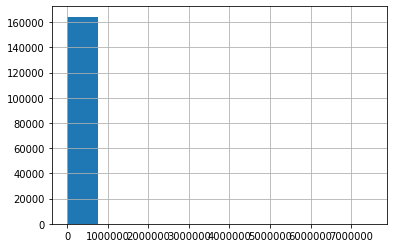

In [348]:
encode_train['Annual_Income'].hist(bins= 10);

In [349]:
# labels_4 = [1,2,3,4]
# encode_train['Annual_Income'] = pd.qcut(encode_train['Annual_Income'], q=4, labels= labels_4)

encode_train['Annual_Income'] = np.log1p(encode_train['Annual_Income'])
encode_test['Annual_Income'] = np.log1p(encode_test['Annual_Income'])

### Loan amount requsted

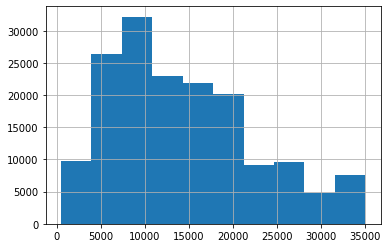

In [350]:
encode_train['Loan_Amount_Requested'].hist();

In [351]:
# labels_4 = [1,2,3,4]
# encode_train['Loan_Amount_Requested'] = pd.qcut(encode_train['Loan_Amount_Requested'], q=4, labels= labels_4)
encode_train['Loan_Amount_Requested'] = np.log1p(encode_train['Loan_Amount_Requested'])
encode_test['Loan_Amount_Requested'] = np.log1p(encode_test['Loan_Amount_Requested'])

In [352]:
encode_train.head()

,Loan_Amount_Requested,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Experience,Closed_Accounts
0,8.853808,3,11.127278,2,0,18.37,0,31.0,9,14,0,1,0.5,5
1,10.308986,0,11.050906,0,2,14.93,0,17.0,12,24,0,3,4.0,12
2,10.115611,0,11.232780,1,2,15.88,0,31.0,12,16,1,3,7.0,4
3,9.680406,3,10.935978,1,2,14.34,3,31.0,16,22,1,3,0.5,6
4,9.741027,2,11.472114,1,2,22.17,1,31.0,19,30,0,1,8.0,11


In [353]:
encode_test.head()

,Loan_ID,Loan_Amount_Requested,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Experience,Closed_Accounts
0,10164310,10.221978,0,11.767575,0,2,12.87,0,68.0,10,37,1,10.0,27
1,10164311,10.165890,4,11.608245,2,1,11.37,0,31.0,6,23,1,10.0,17
2,10164312,8.712102,4,11.225257,0,2,6.83,2,31.0,5,20,1,0.5,15
3,10164313,9.392745,0,11.198228,1,2,7.76,0,31.0,6,8,1,10.0,2
4,10164314,10.463132,0,11.957618,2,2,9.62,0,26.0,9,21,1,0.5,12


### Debt_To_Income

In [354]:
encode_train['Debt_To_Income'].describe()

count    164309.000000
mean         17.207189
std           7.845083
min           0.000000
25%          11.370000
50%          16.840000
75%          22.780000
max          39.990000
Name: Debt_To_Income, dtype: float64

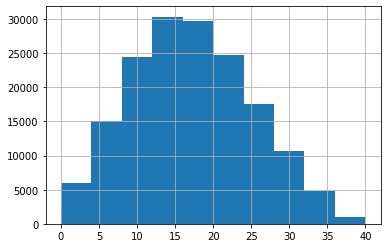

In [355]:
encode_train['Debt_To_Income'].hist()

In [356]:
labels_4 = [1,2,3,4]
encode_train['Debt_To_Income'] = pd.qcut(encode_train['Debt_To_Income'], q=4, labels= labels_4)
encode_test['Debt_To_Income'] = pd.qcut(encode_test['Debt_To_Income'], q=4, labels= labels_4)

In [357]:
encode_train.head()

,Loan_Amount_Requested,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Experience,Closed_Accounts
0,8.853808,3,11.127278,2,0,3,0,31.0,9,14,0,1,0.5,5
1,10.308986,0,11.050906,0,2,2,0,17.0,12,24,0,3,4.0,12
2,10.115611,0,11.232780,1,2,2,0,31.0,12,16,1,3,7.0,4
3,9.680406,3,10.935978,1,2,2,3,31.0,16,22,1,3,0.5,6
4,9.741027,2,11.472114,1,2,3,1,31.0,19,30,0,1,8.0,11


In [358]:
encode_test.head()

,Loan_ID,Loan_Amount_Requested,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Experience,Closed_Accounts
0,10164310,10.221978,0,11.767575,0,2,2,0,68.0,10,37,1,10.0,27
1,10164311,10.165890,4,11.608245,2,1,2,0,31.0,6,23,1,10.0,17
2,10164312,8.712102,4,11.225257,0,2,1,2,31.0,5,20,1,0.5,15
3,10164313,9.392745,0,11.198228,1,2,1,0,31.0,6,8,1,10.0,2
4,10164314,10.463132,0,11.957618,2,2,1,0,26.0,9,21,1,0.5,12


### Number_Open_Accounts

In [359]:
encode_train['Number_Open_Accounts'].describe()

count    164309.000000
mean         11.193818
std           4.991813
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          76.000000
Name: Number_Open_Accounts, dtype: float64

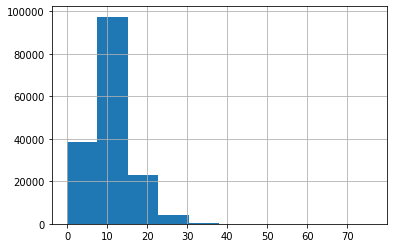

In [360]:
encode_train['Number_Open_Accounts'].hist()

In [361]:
# labels_4 = [1,2,3,4]
# encode_train['Number_Open_Accounts'] = pd.qcut(encode_train['Number_Open_Accounts'], q=4, labels= labels_4)

encode_train['Number_Open_Accounts']= np.log1p(encode_train['Number_Open_Accounts'], where = encode_train['Number_Open_Accounts']!=0)
encode_test['Number_Open_Accounts']= np.log1p(encode_test['Number_Open_Accounts'], where = encode_test['Number_Open_Accounts']!=0)

encode_train.head()

,Loan_Amount_Requested,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Experience,Closed_Accounts
0,8.853808,3,11.127278,2,0,3,0,31.0,2.302585,14,0,1,0.5,5
1,10.308986,0,11.050906,0,2,2,0,17.0,2.564949,24,0,3,4.0,12
2,10.115611,0,11.232780,1,2,2,0,31.0,2.564949,16,1,3,7.0,4
3,9.680406,3,10.935978,1,2,2,3,31.0,2.833213,22,1,3,0.5,6
4,9.741027,2,11.472114,1,2,3,1,31.0,2.995732,30,0,1,8.0,11


# Save Encoded Data

### All features

In [362]:
encode_train.head()

,Loan_Amount_Requested,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Experience,Closed_Accounts
0,8.853808,3,11.127278,2,0,3,0,31.0,2.302585,14,0,1,0.5,5
1,10.308986,0,11.050906,0,2,2,0,17.0,2.564949,24,0,3,4.0,12
2,10.115611,0,11.232780,1,2,2,0,31.0,2.564949,16,1,3,7.0,4
3,9.680406,3,10.935978,1,2,2,3,31.0,2.833213,22,1,3,0.5,6
4,9.741027,2,11.472114,1,2,3,1,31.0,2.995732,30,0,1,8.0,11


In [363]:
encode_test.head()

,Loan_ID,Loan_Amount_Requested,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Experience,Closed_Accounts
0,10164310,10.221978,0,11.767575,0,2,2,0,68.0,2.397895,37,1,10.0,27
1,10164311,10.165890,4,11.608245,2,1,2,0,31.0,1.945910,23,1,10.0,17
2,10164312,8.712102,4,11.225257,0,2,1,2,31.0,1.791759,20,1,0.5,15
3,10164313,9.392745,0,11.198228,1,2,1,0,31.0,1.945910,8,1,10.0,2
4,10164314,10.463132,0,11.957618,2,2,1,0,26.0,2.302585,21,1,0.5,12


In [364]:
encode_train.to_csv("../../data/train/train_processed.csv", index=False)
encode_test.to_csv("../../data/test/test_processed.csv", index=False)